# Exploratory Data Analysis (EDA)

As you may have noticed in data preparation step, we don't have any separate test set for our data; this means that we need to create a representative test set manually (for an independent evaluation purpose), and never touch it for EDA insights and other data preprocessing steps. Our explorations will take place on separated __train data only__ to avoid __data leakage__.

In [1]:
# required library imports & variable declarations

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

RANDOM_SEED = 1024

## Reading Raw Data from File

In [2]:
# define relative data path (according the current path of this notebook) and data file name
DATA_PATH = './scripts/data'
FILE_NAME = 'dataset_all.csv.gz'

df_all = pd.read_csv(f'{DATA_PATH}/{FILE_NAME}')
df_all

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


## Splitting Data into Representative Train and Test Sets
In order to split a dataframe into representative parts, we can utilize scikit-learn's stratified k-fold split, which is what we did in [ml-workflow project](https://github.com/hamedonline/ml-workflow). An alternative way to do this would be to use scikit-learn's __*train_test_split()*__ function alongside it's _'stratified'_ parameter that allows us to pass classification target column to derive the intended distribution ratio:

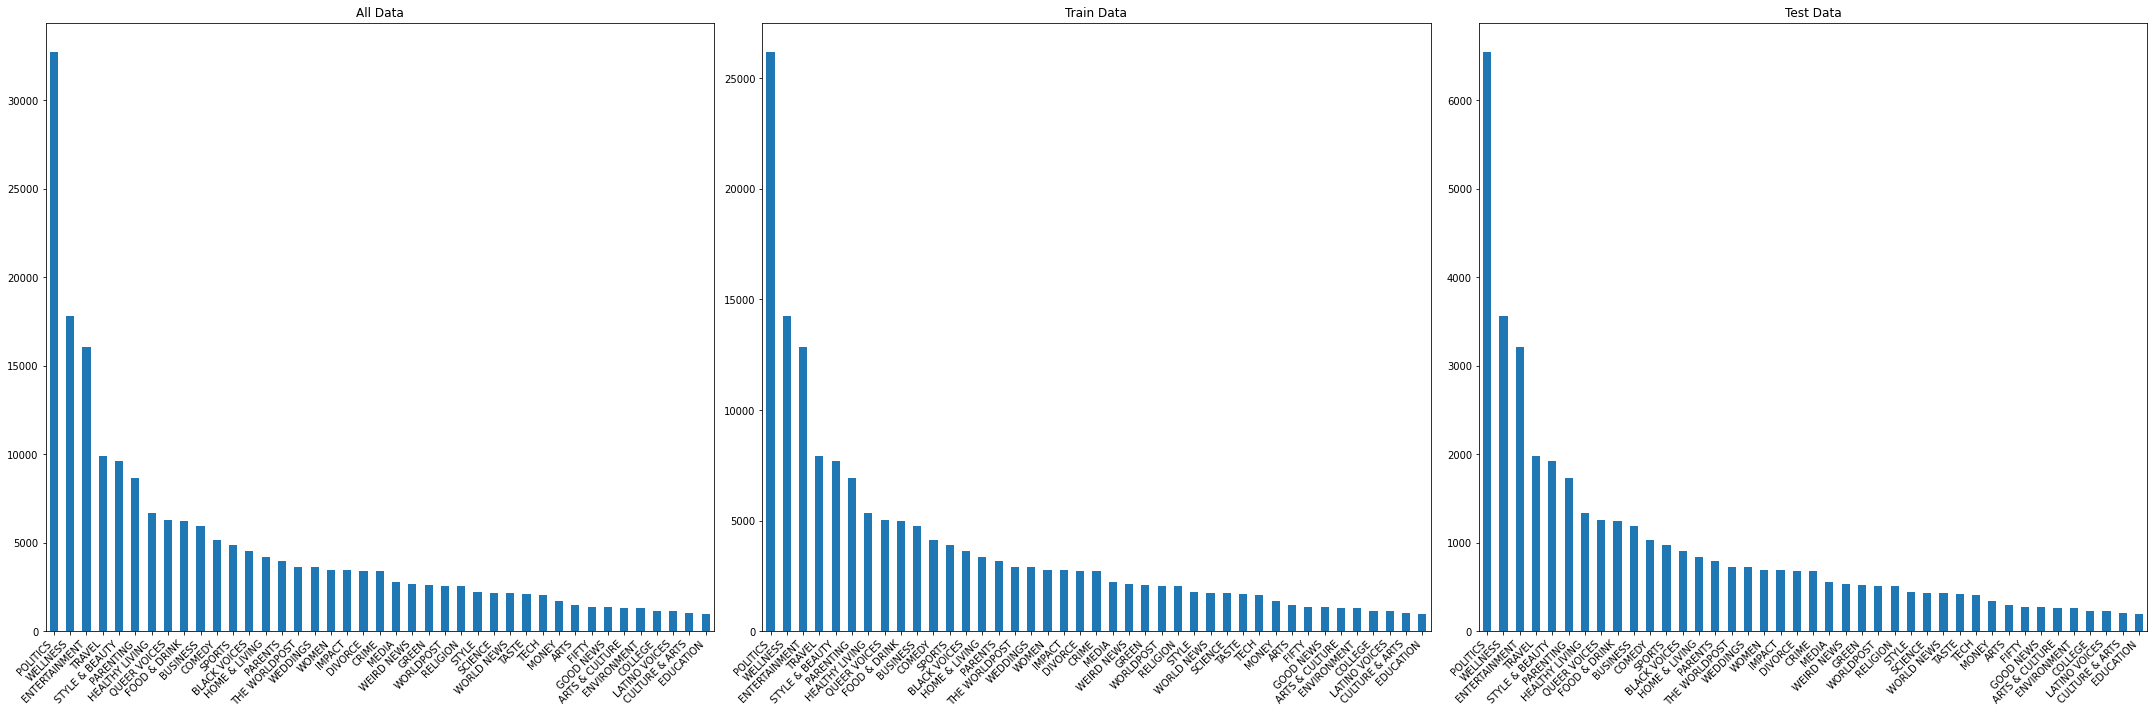

In [3]:
from sklearn.model_selection import train_test_split

column_target = 'category'
test_size_fraction = 0.2

# let's shuffle the whole dataframe before proceeding
df_all = df_all.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
# second shuffle with an exponential random seed :D
df_all = df_all.sample(frac=1, random_state=(RANDOM_SEED**2)).reset_index(drop=True)

# split the data into representative training and test sets
df_train, df_test = train_test_split(df_all, test_size=test_size_fraction, stratify=df_all[column_target], random_state=RANDOM_SEED)
# reset the index of the dataframes
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# plot the distribution of the target variable in train & test splits to see if it they are representative of the whole data
fig = plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
df_all[column_target].value_counts().plot(kind='bar', title='All Data')
plt.xticks(rotation=45, ha="right")
plt.subplot(1, 3, 2)
df_train[column_target].value_counts().plot(kind='bar', title='Train Data')
plt.xticks(rotation=45, ha="right")
plt.subplot(1, 3, 3)
df_test[column_target].value_counts().plot(kind='bar', title='Test Data')
plt.xticks(rotation=45, ha="right")
fig.tight_layout(pad=1.0)

That's right. Seeing above plots, we can confidently confirm that both train and test splits represent the same distribution in our total data.

## Initial Data Insights

In [4]:
# sample counts in train & test splits
print(f'Train Data: {df_train.shape[0]}')
print(f'Test Data: {df_test.shape[0]}')

Train Data: 160682
Test Data: 40171


Over __160k+__ training samples abd __40k+__ test samples, that's good!

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160682 entries, 0 to 160681
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           160682 non-null  object
 1   headline           160677 non-null  object
 2   authors            131399 non-null  object
 3   link               160682 non-null  object
 4   short_description  144984 non-null  object
 5   date               160682 non-null  object
dtypes: object(6)
memory usage: 7.4+ MB


The dataset has __6__ columns, among which the first two (_"category"_ and _"headline"_) are the ones that interest us for the NLP case we'd like to train a model on. Column names are already lowercase and spaces between words of a column title are filled with underscore; therefore we won't need to touch them.

In [6]:
df_train.describe()

,category,headline,authors,link,short_description,date
count,160682,160677,131399,160682,144984,160682
unique,41,159577,24489,160653,142952,2309
top,POLITICS,Sunday Roundup,Lee Moran,https://www.huffingtonpost.comhttp://highline....,Welcome to the HuffPost Rise Morning Newsbrief...,2016-11-01
freq,26191,74,1920,2,150,89


We can see that majority of headlines belong to __"POLITICS"__ category. We have __41__ categories in our news headlines and that's pretty large for a classification task.

## Missing Values
We need to figure out if our dataset contains any missing values (referred to as __NaN__ in a pandas dataframe). This is a critical checking in order to avoid data errors in training phase. Just take a note that we need to do this checking for both train & test datasets.

In [7]:
missing_values_count_train = sum(df_train.isnull().sum().tolist())
missing_values_count_test  = sum(df_test.isnull().sum().tolist())

train_columns_with_missing_values, test_columns_with_missing_values = [], []
if missing_values_count_train > 0:
    train_columns_with_missing_values = df_train.columns[df_train.isnull().any()]
if missing_values_count_test  > 0:
    test_columns_with_missing_values = df_test.columns[df_test.isnull().any()]


print(f'Train Samples with Missing Values: {missing_values_count_train}\nColumn Names with Missing Values: {list(train_columns_with_missing_values)}', '\n')
print(f'Test Samples with Missing Values: {missing_values_count_test}\nColumn Names with Missing Values: {list(test_columns_with_missing_values)}', '\n')

Train Samples with Missing Values: 44986
Column Names with Missing Values: ['headline', 'authors', 'short_description'] 

Test Samples with Missing Values: 11352
Column Names with Missing Values: ['headline', 'authors', 'short_description'] 



So, our dataset has plenty of missing values in mainly 3 columns (_"headline"_, _"authors"_ and _"short\_description"_). The only column among them that we are concerned for is the _"headline"_ column. Let's see how many missing headlines exist in both train & test splits.

In [8]:
# print rows with missing values in "headline" column of train data
df_train.loc[df_train['headline'].isnull()]

,category,headline,authors,link,short_description,date
103021,MEDIA,NaN,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/beverly-h...,NaN,2015-01-13
119047,POLITICS,NaN,"Robert Moran, ContributorRobert Moran leads Br...",https://www.huffingtonpost.com/entry/lincoln-2...,NaN,2015-08-22
127221,WORLDPOST,NaN,"Natasha Srdoc, ContributorAuthor, Economist, C...",https://www.huffingtonpost.com/entry/us-and-eu...,NaN,2015-03-29
129241,BUSINESS,NaN,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/disney-ce...,NaN,2015-01-25
150666,QUEER VOICES,NaN,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/beverly-h...,NaN,2014-08-28


In [9]:
# print rows with missing values in "headline" column of test data
df_test.loc[df_test['headline'].isnull()]

,category,headline,authors,link,short_description,date
7094,RELIGION,NaN,"Matthew Fox, ContributorRadical theologian Mat...",https://www.huffingtonpost.com/entry/post_9671...,Let everyone not wrapped in tired and disprove...,2015-06-30


Not much. In fact only __5__ samples in train and __1__ sample in test data. Nevertheless, we need to remember this and drop these samples during __"Data Cleaning"__ step.

## Feature Analysis
We have a column named _"headline"_ which embodies the features (words) we need for text classification task. Preprocessing on these features could be useful. For example, we'd better apply some cleaning on texts such as trimming possible extra spaces, or lowercasing all words in a headline; this ensures that all the word features are in a uniform format for further analysis. Let's define a function that takes care of text preprocessing and create another column named as _"headline\_preprocessed"_ which includes the headlines after applying the function on them. Later on we will move our preprocessing function to a __utils__ file inside __scripts__ folder.

In [10]:
import re
import string


# define a function that applies text preprocessing to input text
def preprocess_text(text: str) -> str:
    text = text.lower()  # convert to lowercase
    text = re.sub('(#)(\S+)', r' \2', text)  # remove hashtags sign
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuations
    text = re.sub(' +', ' ', text)  # replace multiple whitespaces with a single space
    text = text.strip()  # remove leading and trailing whitespaces
    return text

# create a new column in train dataframe which contains headline in preprocessed form
df_train['headline_preprocessed'] = df_train.apply(lambda row: preprocess_text(str(row['headline'])), axis=1)

df_train.head()

,category,headline,authors,link,short_description,date,headline_preprocessed
0,WELLNESS,Definitions Of 'Joy': How You Describe That Lo...,NaN,https://www.huffingtonpost.com/entry/definitio...,"""God's presence, and the love of my family and...",2013-07-14,definitions of joy how you describe that lovel...
1,POLITICS,Supreme Court Declines Obamacare Challenge Bro...,Robert Baldwin III,https://www.huffingtonpost.com/entry/supreme-c...,Dr. Steven Hotze's case was backed by Sen. Ted...,2016-03-01,supreme court declines obamacare challenge bro...
2,TASTE,Teeling Whiskey: The Irish Phoenix,"Joseph V. Micallef, ContributorBest Selling Mi...",https://www.huffingtonpost.com/entry/teeling-w...,NaN,2016-08-20,teeling whiskey the irish phoenix
3,POLITICS,"Run, Ted Cruz, Run! Hillary Clinton and the De...","H. A. Goodman, ContributorColumnist published ...",https://www.huffingtonpost.com/entry/run-ted-c...,Why does GOP enthusiasm for the tea party sena...,2014-06-08,run ted cruz run hillary clinton and the democ...
4,ENTERTAINMENT,Gregg Allman Denies Rumors He's In Hospice Care,David Moye,https://www.huffingtonpost.com/entry/gregg-all...,"Last month, the music legend canceled all his ...",2017-04-24,gregg allman denies rumors hes in hospice care


Now we can go ahead and continue our analysis with _"headline\_preprocessed"_ column.

### Headline Text Length and Word Count
Let's take a look at how many characters and words exist in our headlines. We'll put out __character length__ and __word count__ distribution plots and then calculate average values for both characteristics.

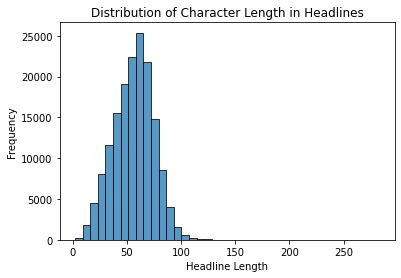

In [11]:
# plot length of headlines in train data
ax = sns.histplot(df_train['headline_preprocessed'].str.len(), bins=40)
ax.set_title('Distribution of Character Length in Headlines')
ax.set_xlabel('Headline Length')
ax.set_ylabel('Frequency')
plt.show()

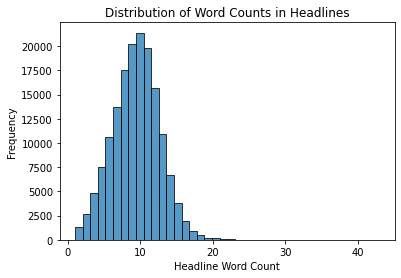

In [12]:
# plot word counts of headlines in train data
ax = sns.histplot(df_train['headline_preprocessed'].str.split().str.len(), bins=40)
ax.set_title('Distribution of Word Counts in Headlines')
ax.set_xlabel('Headline Word Count')
ax.set_ylabel('Frequency')
plt.show()

In [13]:
# print average character length and average word count of headlines in train data
print(f'Average Character Length of Headlines in Train Data: {int(df_train["headline_preprocessed"].str.len().mean())}')
print(f'Average Word Count of Headlines in Train Data: {int(df_train["headline_preprocessed"].str.split().str.len().mean())}')

Average Character Length of Headlines in Train Data: 56
Average Word Count of Headlines in Train Data: 9


In [14]:
# print minimum and maximum values for character length and word count
char_length_min, char_length_max = df_train['headline_preprocessed'].str.len().min(), df_train['headline_preprocessed'].str.len().max()
word_length_min, word_length_max = df_train['headline_preprocessed'].str.split().str.len().min(), df_train['headline_preprocessed'].str.split().str.len().max()

print(f'Minimum Character Length of Headlines in Train Data: {char_length_min}', '\n',
      f'Maximum Character Length of Headlines in Train Data: {char_length_max}', '\n',
      f'Minimum Word Count of Headlines in Train Data: {word_length_min}', '\n',
      f'Maximum Word Count of Headlines in Train Data: {word_length_max}', sep='')

Minimum Character Length of Headlines in Train Data: 2
Maximum Character Length of Headlines in Train Data: 283
Minimum Word Count of Headlines in Train Data: 1
Maximum Word Count of Headlines in Train Data: 43


Ok, this is getting interesting. There are headlines with as low as __2__ characters and __1__ word! We should have serious doubts about such data's quality and whether they can be useful for our model's training. Let's see some of them in more detail:

In [15]:
# print rows with only 1 word in headline
df_train.loc[df_train['headline_preprocessed'].str.split().str.len() < 2]

,category,headline,authors,link,short_description,date,headline_preprocessed
1145,COMEDY,Hugs,"Marcia Liss, Contributor(Almost) Famous Cartoo...",https://www.huffingtonpost.com/entry/hugs_b_89...,NaN,2016-01-10,hugs
2439,COMEDY,Marcia,"Marcia Liss, Contributor(Almost) Famous Cartoo...",https://www.huffingtonpost.com/entry/marcia_b_...,NaN,2014-08-18,marcia
3316,POLITICS,Reunited,Christine Roberts,https://www.huffingtonpost.com/entry/reunited_...,I grew up on the border between the United Sta...,2017-08-16,reunited
3715,ENTERTAINMENT,MOSS--Ep.11,"Spottoon, ContributorSpottoon brings readers i...",https://www.huffingtonpost.com/entry/moss-ep11...,A man in search for the mystery behind his est...,2015-09-07,mossep11
4065,POLITICS,Denouement,"Daniel N. Nelson, ContributorInternational Con...",https://www.huffingtonpost.com/entry/denouemen...,This is an American defeat for a war of choice...,2014-06-20,denouement
...,...,...,...,...,...,...,...
156565,WELLNESS,Jealousy,"Robert C. Jameson, Contributor\nMarriage, Fami...",https://www.huffingtonpost.com/entry/jealousy_...,We can't control anything or anyone outside of...,2013-11-25,jealousy
156583,ARTS,Surveillance.02,"Anna Van Lenten, ContributorIndependent Curato...",https://www.huffingtonpost.com/entry/post_9156...,"The second in a series, Surveillance.02 is an ...",2015-03-08,surveillance02
156683,FOOD & DRINK,Americans,"Gino Campagna, Contributor\nChef Gino!",https://www.huffingtonpost.com/entry/post_us_5...,It's pretty simple: we go to community centers...,2013-07-22,americans
157309,SPORTS,Ozymandias,"Joe Singh, ContributorGrowth Strategist",https://www.huffingtonpost.com/entry/ozymandia...,"An empire, more often than not, doesn't erupt ...",2015-02-02,ozymandias


Most of the above samples seem useless for a news headline classification task. But when we look carefully, we can see that there is at least one sample which used to be a hashtag title (the last one above). Separating words in such cases can produce a meaningful headline. This is what we need to do to handle similar cases: replace possible concatenated headlines with separate words version, and then look at dataset again and drop the rows which have only 1 word in their headline.

In [16]:
import wordninja


def split_concatenated(text: str) -> str:
    '''
    splits words of a concatenated English text string.

    Args:
        text (str): example => 'thistextstringisconcatenated'

    Returns:
        str: example => 'this text string is concatenated'
    '''
    text = ' '.join(wordninja.split(text))
    return text


# apply splitting function to headlines with just 1 word
df_train['headline_preprocessed'] = df_train['headline_preprocessed'].map(lambda value: split_concatenated(value) if (len(str(value).split()) < 2) else value)

# drop remaining rows with only 1 word in headline
df_train = df_train.loc[~df_train['headline_preprocessed'].str.split().str.len() < 2].reset_index(drop=True)

Let's analyze our headlines for one more time. I want to find the headlines which have 10 or less characters and contain more than 2 words: 

In [17]:
df_train.loc[(df_train['headline_preprocessed'].str.len() <= 10) & (df_train['headline_preprocessed'].str.split().str.len() > 2)]

,category,headline,authors,link,short_description,date,headline_preprocessed
3715,ENTERTAINMENT,MOSS--Ep.11,"Spottoon, ContributorSpottoon brings readers i...",https://www.huffingtonpost.com/entry/moss-ep11...,A man in search for the mystery behind his est...,2015-09-07,moss ep 11
7124,FIFTY,WHAT I SEE,"Shavawn Berry, ContributorPoet",https://www.huffingtonpost.com/entry/featured-...,NaN,2014-06-11,what i see
7654,WEDDINGS,A New Age,"Rebecca Land Soodak, Contributor\nWriter; Author",https://www.huffingtonpost.com/entry/a-new-age...,"But in time, the perception of our relationshi...",2012-03-27,a new age
13910,RELIGION,I Hate Him,"David Katz, M.D., ContributorFounder, True Hea...",https://www.huffingtonpost.com/entry/i-hate-hi...,I worry that this primacy of hate over love me...,2015-06-19,i hate him
15311,WOMEN,This Is 35,"Beth Leyba, ContributorFeminist, Activist, Wri...",https://www.huffingtonpost.com/entry/this-is-3...,"It's okay to do life backwards, or sideways, o...",2014-05-13,this is 35
15815,WELLNESS,The 'I' Word,"Linda & Charlie Bloom, Contributor\nExperts in...",https://www.huffingtonpost.com/entry/love-and-...,"I try, not always successfully, to live in int...",2013-12-12,the i word
16276,QUEER VOICES,The 'F' Word,"Eliel Cruz, Contributor\nExecutive Director, F...",https://www.huffingtonpost.com/entry/the-f-wor...,"I've never been OK with the word ""faggot"" or i...",2013-01-26,the f word
19214,HEALTHY LIVING,"F You, 2015","Kait Hanson, ContributorHawaii Writer & Blogger",https://www.huffingtonpost.com/entry/f-you-201...,Finding focus can sometimes be a struggle for ...,2014-12-31,f you 2015
22556,WORLDPOST,IDPistan,"Zaheen Fatima, ContributorWriter",https://www.huffingtonpost.com/entry/idpistan_...,We live within the same borders as these unluc...,2014-12-30,idp is tan
24617,QUEER VOICES,A Gay CEO?,"Jim Joseph, ContributorMarketing Master - Auth...",https://www.huffingtonpost.com/entry/a-gay-ceo...,"Sure, we've grown accustomed to celebrities co...",2014-10-31,a gay ceo


Such interesting examples! Just look at the headlines and see if you can guess the category they belong to. I bet you'll find it difficult.
- "I Hate Him" is categorized under "RELIGION"!
- "The 'T' Word" under "QUEER VOICES" and "The 'C' Word" under "DIVORCE". Can you guess why by only looking at the headline?

I believe many of these can be seen as low quality samples for our objective, and would only complicate the learning process for our neural network. We should probably check the impact of dropping these samples on our model's performance. Please note that not all of these samples are useless though. For example, "I'm a Mom" under "PARENTING" category is a valid one.

### Frequent Words
It's time to find out which words are most frequent in our headlines. We'll use the same preprocessed headlines to achieve this goal.

In [18]:
most_frequent_words = pd.Series(' '.join(df_train['headline_preprocessed']).lower().split()).value_counts()[:200]

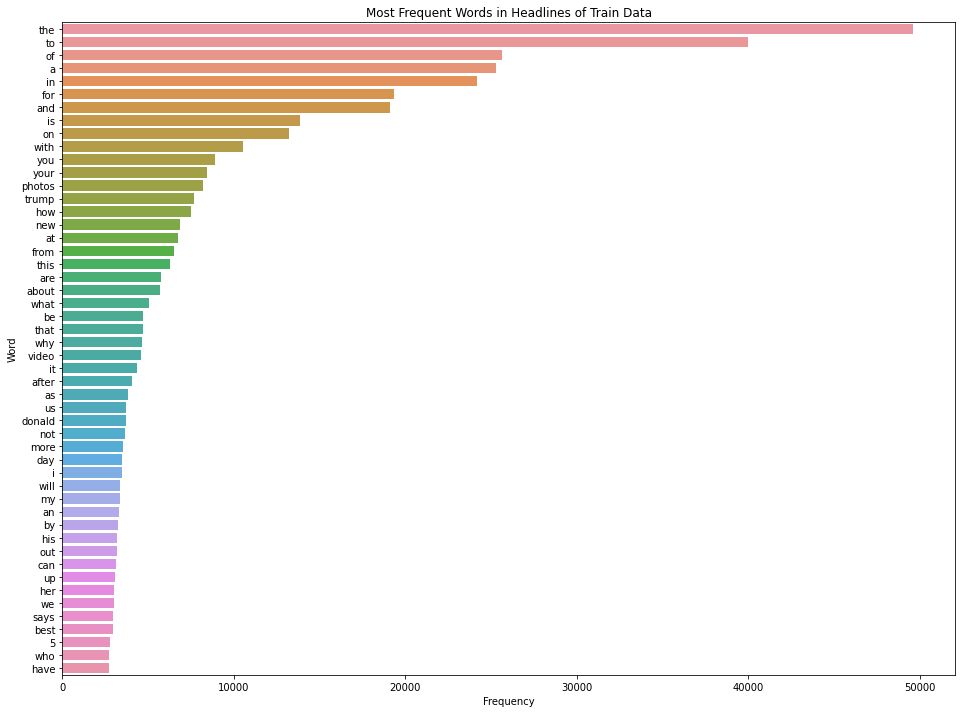

In [19]:
# plot top 50 most frequent words in headlines of train data
size_limit = 50

fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=most_frequent_words.values[:size_limit],
            y=most_frequent_words.index[:size_limit],
            ax=ax)
ax.set_title('Most Frequent Words in Headlines of Train Data')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
plt.show()

Did you notice the words? Some top ones are _"the"_, _"to"_, _"of"_, _"a"_, and so on. Most of them are highly frequent words you can find in any English text out there. These are called __"stop words"__ and they don't offer any insights about our headlines. We need to ignore these words while analyzing our headlines for the most common words.

We can utilize scikit-learn's stop words module to get a list of stop words and then use it to filter out the stop words from our headlines.

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# most frequent words in headlines of train data without stopwords
most_frequent_words_dict = most_frequent_words.to_dict()
most_frequent_words_without_stopwords = {word:frequency for word, frequency in most_frequent_words_dict.items() if word not in ENGLISH_STOP_WORDS}

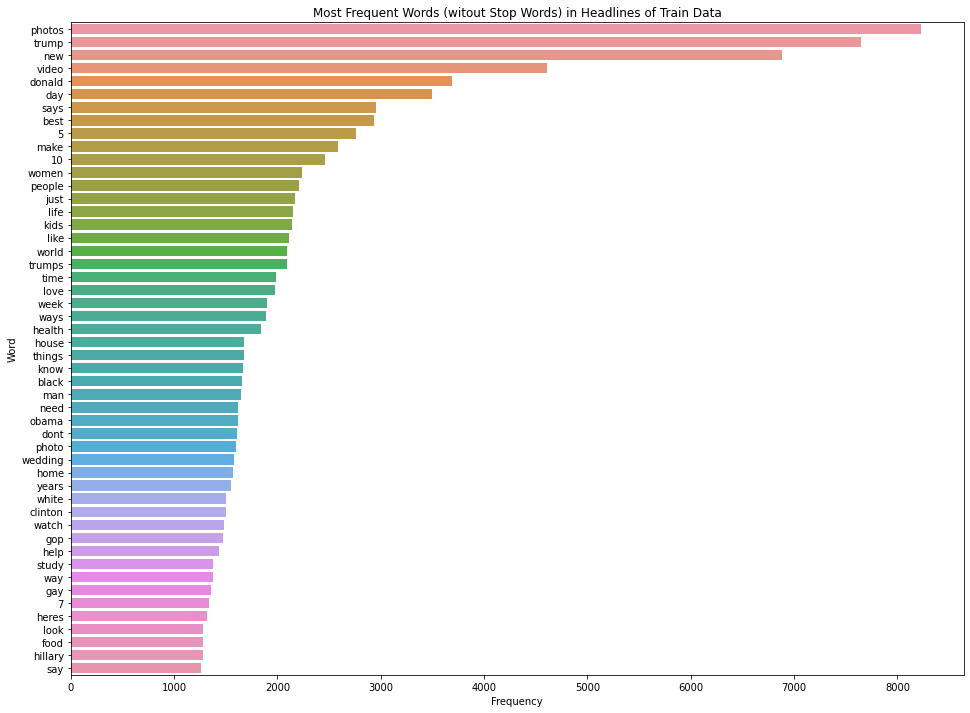

In [21]:
# plot top 50 most frequent words (without stop words) in headlines of train data
size_limit = 50

fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=list(most_frequent_words_without_stopwords.values())[:size_limit],
            y=list(most_frequent_words_without_stopwords.keys())[:size_limit],
            ax=ax)
ax.set_title('Most Frequent Words (witout Stop Words) in Headlines of Train Data')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
plt.show()

There we go! This looks better. With "photos" dominating headlines, "trump" is a serious contender for the most frequent word.

We can do even better. Let's define a couple of functions that can extract most frequent words and do our plotting. The extract function should also take care of stop words filtering. This approach would allow us to apply this function independently to any target category of our dataset:

In [22]:
from typing import List
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


def extract_frequent_words(dataframe: pd.DataFrame, text_column_name: str) -> dict:
    frequent_words = pd.Series(' '.join(dataframe[text_column_name]).lower().split()).value_counts()
    frequent_words_dict = frequent_words.to_dict()
    frequent_words_without_stopwords = {word:frequency for word, frequency in frequent_words_dict.items() if word not in ENGLISH_STOP_WORDS}
    return frequent_words_without_stopwords


def plot_frequent_words(frequent_words: dict, size_limit: int = 50, fig_dims: tuple = (16, 12), title: str = '') -> None:
    if len(frequent_words) < size_limit: size_limit = len(frequent_words)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.barplot(x=list(frequent_words.values())[:size_limit],
                y=list(frequent_words.keys())[:size_limit],
                ax=ax)
    
    ax.set_title(f'Most Frequent Words in "{title}"') if len(title) > 0 else ax.set_title(f'Most Frequent Words')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')
    plt.show()

Let's try that out and see some frequent words in different categories:

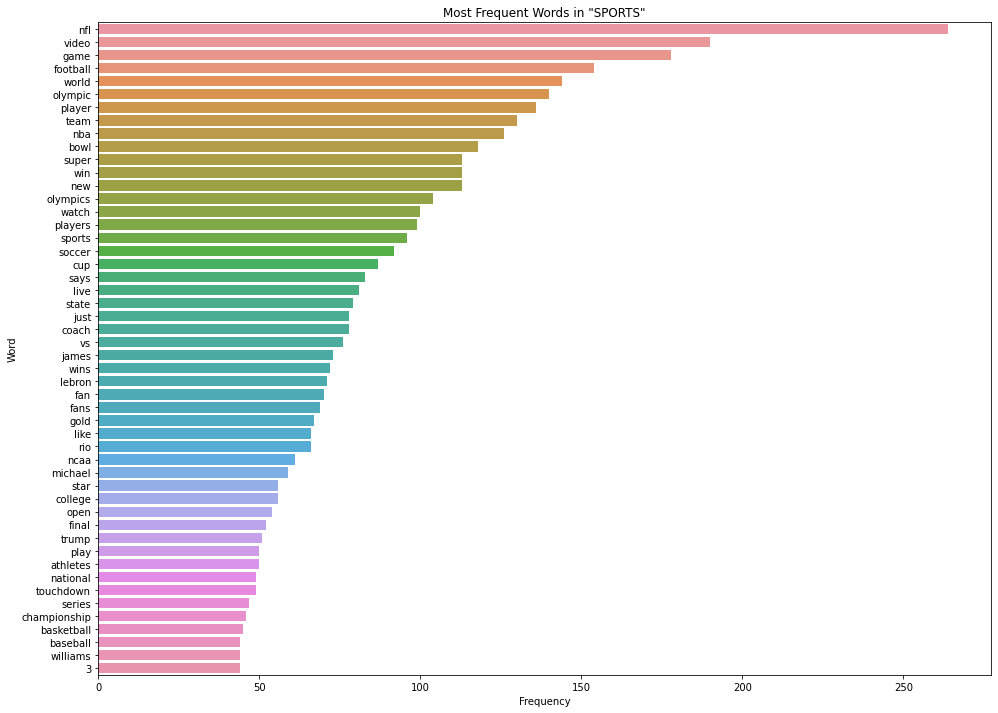

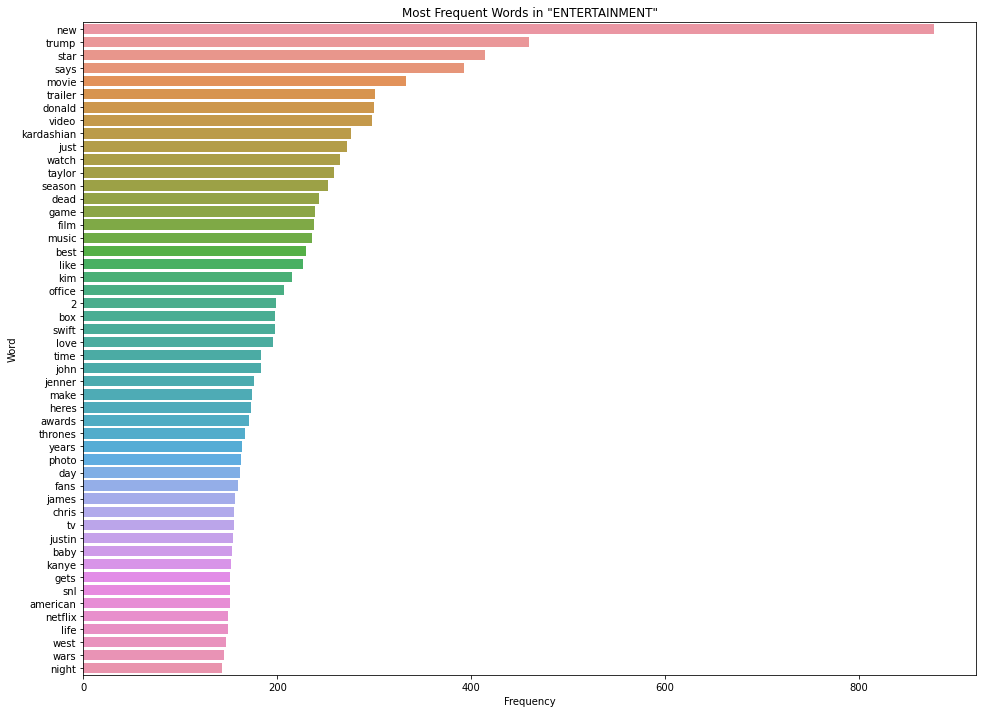

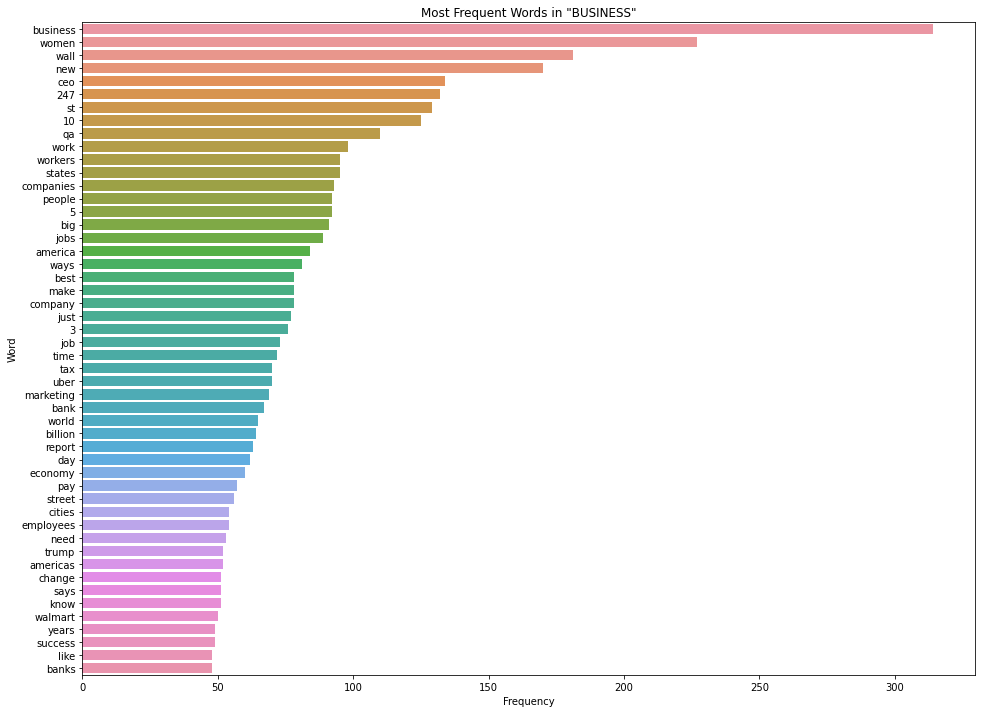

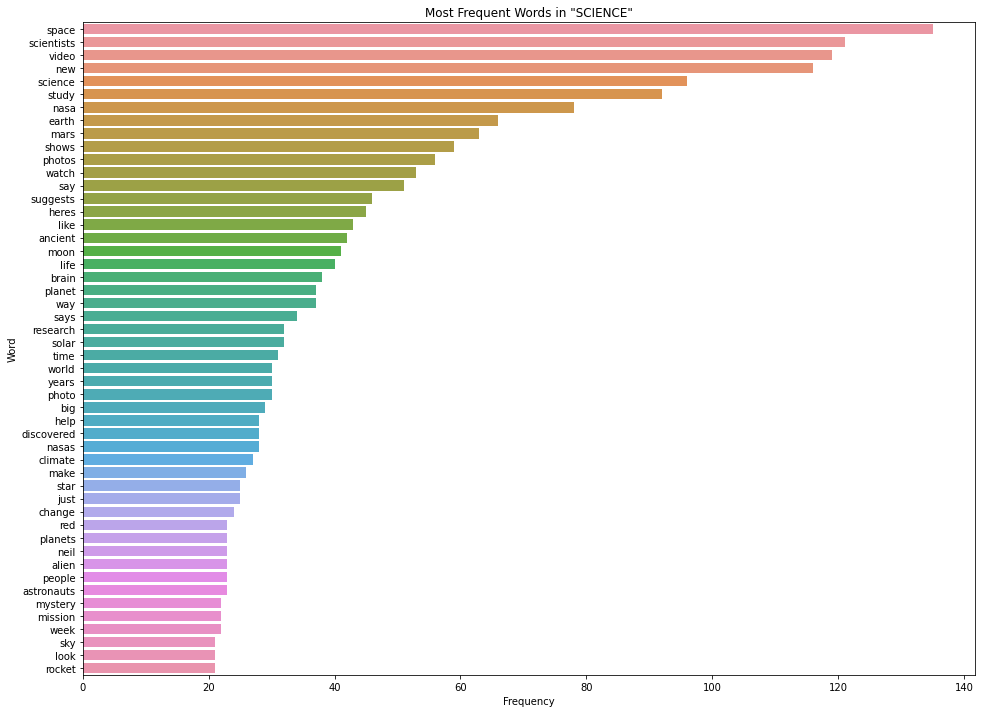

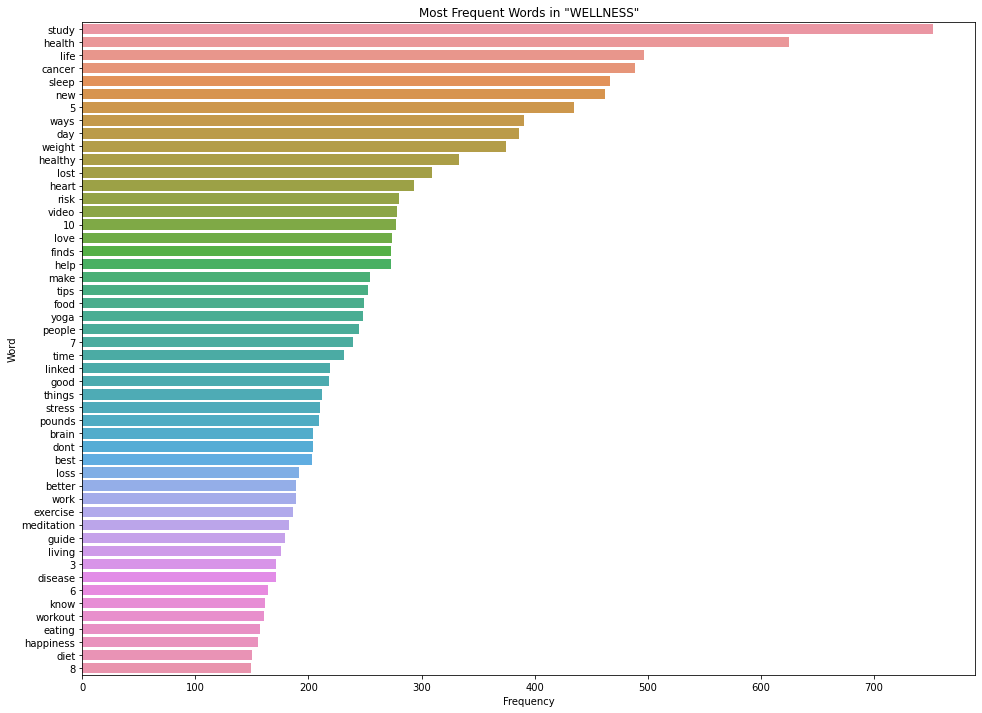

In [23]:
interest_list_of_categories = ['SPORTS', 'ENTERTAINMENT', 'BUSINESS', 'SCIENCE', 'WELLNESS']

for category in interest_list_of_categories:
    most_frequent_words = extract_frequent_words(dataframe=df_train[df_train['category'] == category],
                                                 text_column_name='headline_preprocessed')
    plot_frequent_words(most_frequent_words, size_limit=50, title=category)

### Word Cloud
We can create a nice looking word cloud for our headlines using __wordcloud__ library.

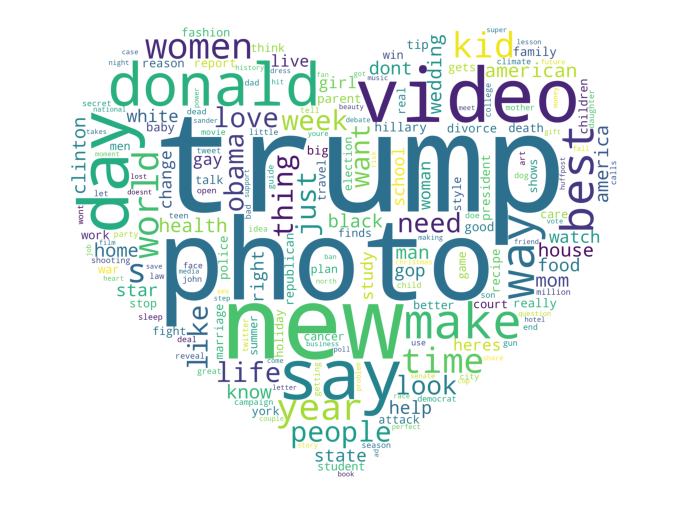

In [24]:
from wordcloud import WordCloud
from PIL import Image


# function that plots a word cloud
def plot_cloud(wordcloud, fig_dims: tuple = (12, 12)) -> None:
    plt.figure(figsize=fig_dims)
    plt.axis("off")
    plt.imshow(wordcloud)

# function that extracts all the words in a text column of a dataframe
def extract_all_words(dataframe: pd.DataFrame, text_column_name: str) -> str:
    return ' '.join(dataframe[text_column_name].to_list())


# read the mask image as a numpy array
mask = np.array(Image.open('./assets/wordcloud-mask.png'))
# put all headlines in a single string variable
all_text = extract_all_words(dataframe=df_train, text_column_name='headline_preprocessed')

# create wordcloud object
wordcloud = WordCloud(width=1024, height=1024, random_state=RANDOM_SEED, background_color='white',
                      collocations=False, stopwords=ENGLISH_STOP_WORDS, mask=mask).generate(all_text)

# plot wordcloud
plot_cloud(wordcloud)

That's nice. We used a mask image that embodies all the words inside itself.

## Analysis of Target Variable
Our target column is the __"category"__ column. We already know from initial data insights that there are __41__ categories in our dataset. Let's see how many headlines belong to each category.

In [25]:
# print count of headline categories
print(f'Number of headline categories: {len(df_train[column_target].unique())}')

# print headline categories
sorted(df_train[column_target].unique())

Number of headline categories: 41


['ARTS',
 'ARTS & CULTURE',
 'BLACK VOICES',
 'BUSINESS',
 'COLLEGE',
 'COMEDY',
 'CRIME',
 'CULTURE & ARTS',
 'DIVORCE',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'FIFTY',
 'FOOD & DRINK',
 'GOOD NEWS',
 'GREEN',
 'HEALTHY LIVING',
 'HOME & LIVING',
 'IMPACT',
 'LATINO VOICES',
 'MEDIA',
 'MONEY',
 'PARENTING',
 'PARENTS',
 'POLITICS',
 'QUEER VOICES',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'STYLE',
 'STYLE & BEAUTY',
 'TASTE',
 'TECH',
 'THE WORLDPOST',
 'TRAVEL',
 'WEDDINGS',
 'WEIRD NEWS',
 'WELLNESS',
 'WOMEN',
 'WORLD NEWS',
 'WORLDPOST']

As I took a glance at above categories, I notice an inconsistency in classifications. Take a look at it yourself. You'll find three categories that most probably refer to the same topic: "ARTS & CULTURE", "CULTURE & ARTS", and "ARTS"! Let's check all the topics for similarity and see if we can find such common ones through coding, by measuring the similarity between these category titles. We'll implement ["Cosine Similarity"](https://studymachinelearning.com/cosine-similarity-text-similarity-metric/) algorithm to achieve this.

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


# calculate similarity scores for each category
categories_list = df_train[column_target].unique().tolist()
vectorizer = CountVectorizer().fit_transform(categories_list)
vectors = vectorizer.toarray()
similarity_scores = cosine_similarity(vectors)
similarity_scores

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
# create similarity dataframe
similarity_matrix = pd.DataFrame(similarity_scores, index=categories_list, columns=categories_list)

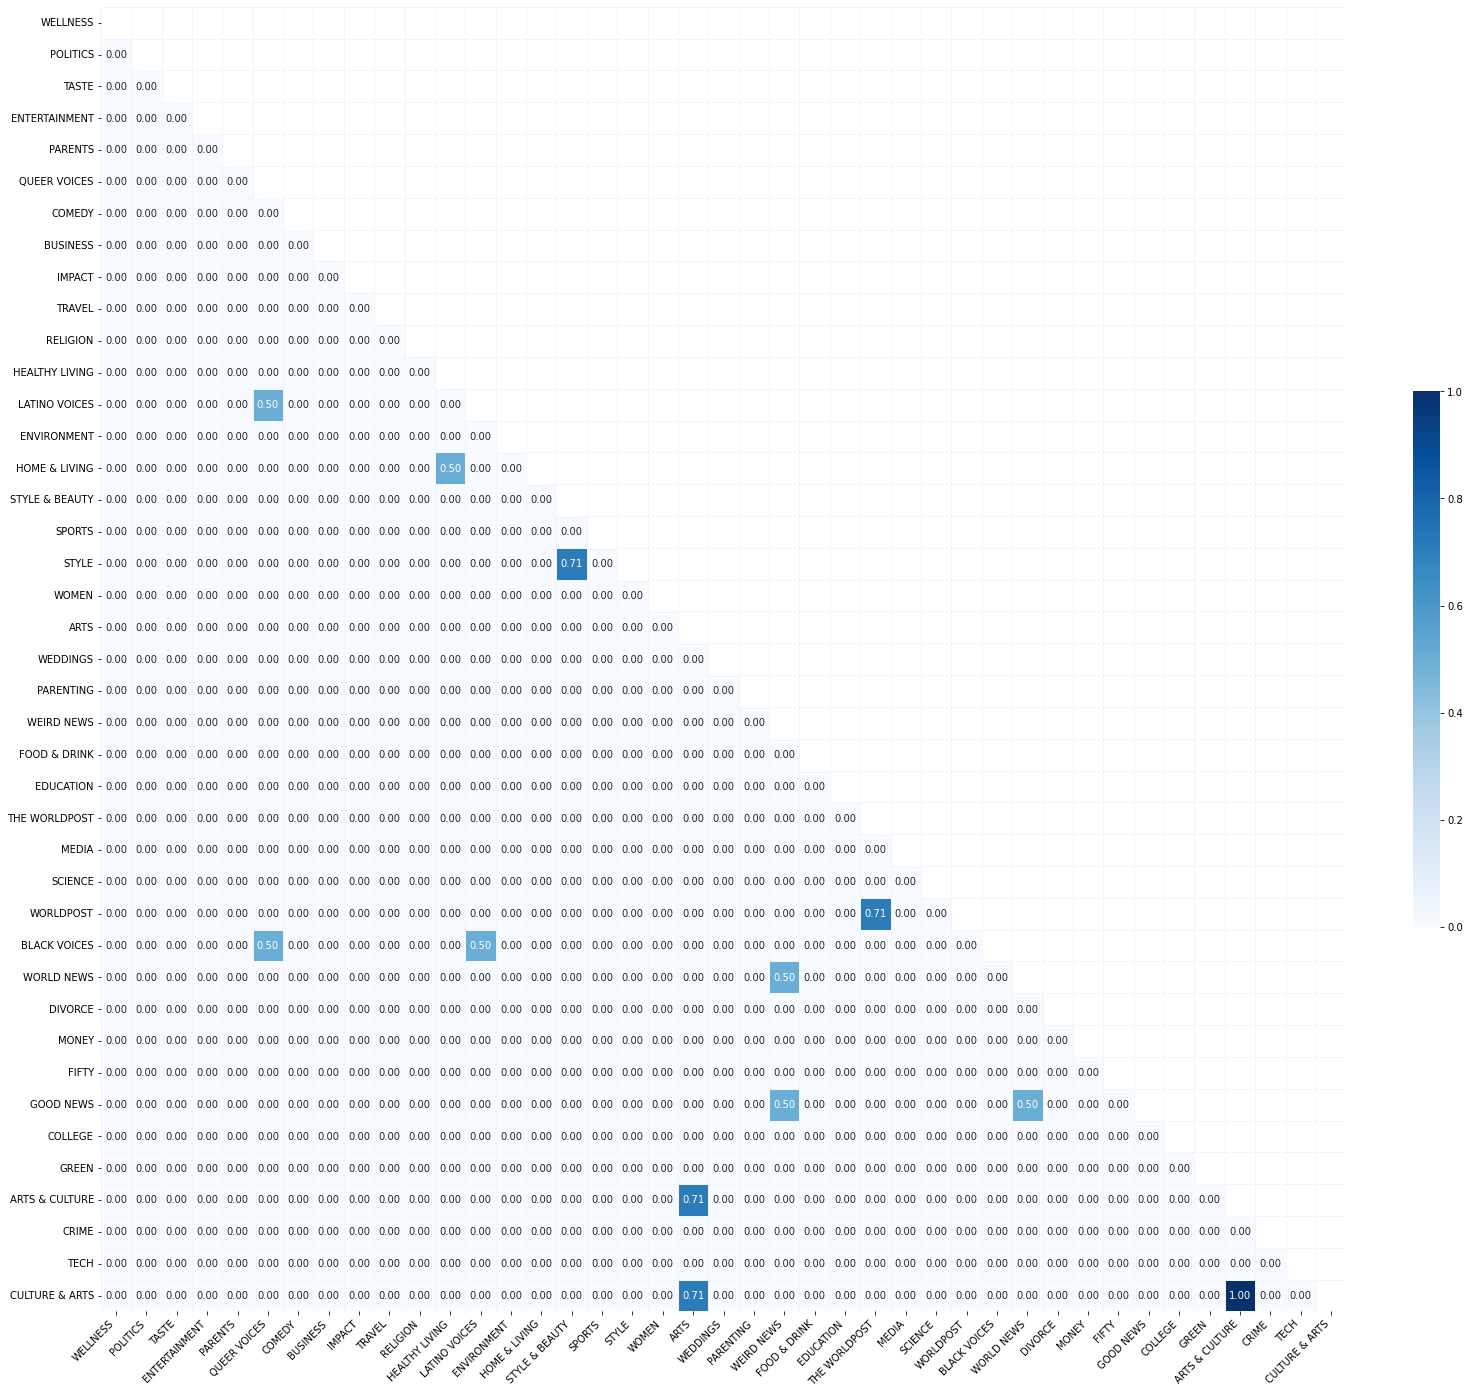

In [28]:
# plot similarity matrix

# create a mask to keep only half of matrix
trimask_categorical = np.triu(np.ones_like(similarity_matrix, dtype=bool))

plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(similarity_matrix, linewidth=1, linecolor='whitesmoke', cmap='Blues',
                      mask=trimask_categorical,  annot=True, fmt='.2f', cbar_kws={'fraction': 0.02})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

None  # don't show the label objects

In [29]:
# create a dictionary with category pairs as keys, and similarity score as value
category_corr_dict = dict()
for i, scores_list in enumerate(similarity_scores):
    for j, score in enumerate(scores_list):
        if (i != j) and ((categories_list[j], categories_list[i]) not in category_corr_dict.keys()):
            category_corr_dict[(categories_list[i], categories_list[j])] = similarity_scores[i][j]

# create score pairs dataframe
similarity_score_df = pd.DataFrame.from_dict(category_corr_dict, orient='index', columns=['similarity_score'])

# sort dataframe by scores
similarity_score_df_sorted = similarity_score_df.sort_values(by=['similarity_score'], ascending=False)
similarity_score_df_sorted[:20]

,similarity_score
"(ARTS & CULTURE, CULTURE & ARTS)",1.000000
"(THE WORLDPOST, WORLDPOST)",0.707107
"(ARTS, CULTURE & ARTS)",0.707107
"(STYLE & BEAUTY, STYLE)",0.707107
"(ARTS, ARTS & CULTURE)",0.707107
"(WEIRD NEWS, GOOD NEWS)",0.500000
"(LATINO VOICES, BLACK VOICES)",0.500000
"(WEIRD NEWS, WORLD NEWS)",0.500000
"(HEALTHY LIVING, HOME & LIVING)",0.500000
"(QUEER VOICES, LATINO VOICES)",0.500000


Good! This surely helps, but if you have already studied topics, you would notice immediately there are more similarities than this. As a matter fact, what did here was a __lexical similarity__ comparison, scratching only the surface and considering visible closeness of strings, which by the way missed _"PARENTS"_ & _"PARENTING"_. There are [more advanced methods](https://medium.com/@adriensieg/text-similarities-da019229c894) which can be taken into account, like __contextual and semantic similarity__, trying to extract something from knowledge-base, similar to what we humans perceive from meanings. As an example, I checked some headlines in both "TASTE" & "FOOD & DRINK" categories, and semantically they belonged to the same category. For now, we will use lexical similarity, plus our human intuition to fix these inconsistencies. We can now build our final classes of news topics for classification task and apply following clean-up logic:

- "ARTS", "CULTURE & ARTS" => "ARTS & CULTURE"
- "THE WORLDPOST", "WORLDPOST" => "WORLD NEWS"
- "STYLE" => "STYLE & BEAUTY"
- "PARENTS" => "PARENTING"
- "TASTE" => "FOOD & DRINK"
- "GREEN", "ENVIRONMENT" => "GREEN & ENVIRONMENT"

These renames should bring down the number of categories from __41__ to __33__.

In [30]:
# create a category tranformer function based on lexical similarity scores and our intuition
def transform_category(value):
    if value in ['ARTS', 'CULTURE & ARTS']:
        return 'ARTS & CULTURE'
    elif value in ['THE WORLDPOST', 'WORLDPOST']:
        return 'WORLD NEWS'
    elif value in ['STYLE']:
        return 'STYLE & BEAUTY'
    elif value in ['PARENTS']:
        return 'PARENTING'
    elif value in ['TASTE']:
        return 'FOOD & DRINK'
    elif value in ['GREEN', 'ENVIRONMENT']:
        return 'GREEN & ENVIRONMENT'
    else:
        return value


df_train['category'] = df_train.apply(lambda row: transform_category(row['category']), axis=1)
df_test['category']  = df_test.apply(lambda row: transform_category(row['category']), axis=1)

Now we can go ahead and check the new value distribution of our target variables.

Number of headline categories: 33


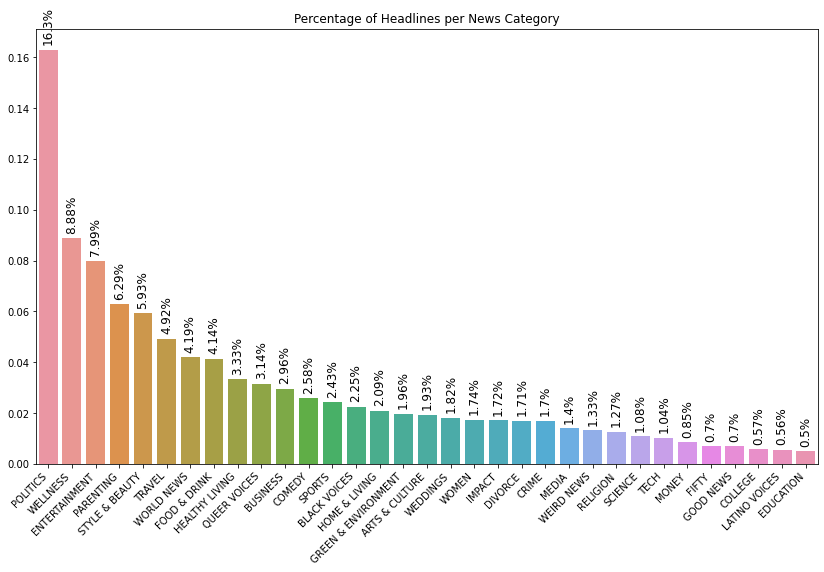

In [31]:
# print new count of headline categories
print(f'Number of headline categories: {len(df_train[column_target].unique())}')


# plot percentage of headlines per category
category_distributions = df_train[column_target].value_counts(normalize=True).to_dict()

fig = plt.figure(figsize=(14, 8))
ax = sns.barplot(x=list(category_distributions.keys()), y=list(category_distributions.values()))
ax.bar_label(ax.containers[0],
             labels=[f'{round(value*100, 2)}%' for value in category_distributions.values()],
             rotation=90, fontsize=12, padding=5)
ax.set_title('Percentage of Headlines per News Category')
plt.xticks(rotation=45, ha="right")
plt.show()

This concludes our EDA. As you can see from above plot, we have got an imbalanced dataset with still many categories. We should definitely tackle data imbalance problem in our model training phase. But before that, we'll move on to data cleaning step to apply the insights we've learned through EDA and prepare our dataset for model training.